# Test of automatic push to Github for R Kernel notebooks
*Matthew Wakefield 18th Nov 2015*

The aim of this notebook is to demonstrate how you can do live demonstrations in R that are automatically pushed to a github repository in real time as you either manually save or they are autosaved.

This method is modelled after a Python version by Peter van Heusden @pvanheus on his blog
[Low Order Magic](http://pvh.wp.sanbi.ac.za/2015/11/06/automatically-commit-and-push-ipython-notebook/)

Setup prior to this notebook was to create a new repository on Github then

    git clone <your_github_repo>
    cd <your_github_repo>
    jupyter notebook --generate-config
    

The config file is in your home directory so this will apply to all your Jupyter notebooks
The following code is added to your $HOME/.jupyter/jupyter_notebook_config.py


    import os
    from subprocess import check_call
    from shlex import split

    def post_save(model, os_path, contents_manager):
        """post-save hook for doing a git commit / push"""
        if model['type'] != 'notebook':
            return # only do this for notebooks
        workdir, filename = os.path.split(os_path)
        if filename.startswith('Scratch') or filename.startswith('Untitled'):
            return # skip scratch and untitled notebooks
        # now do git add / git commit / git push
        check_call(split('git add {}'.format(filename)), cwd=workdir)
        check_call(split('git commit -m "notebook save" {}'.format(filename)), cwd=workdir)
        check_call(split('git push'), cwd=workdir)

    c.FileContentsManager.post_save_hook = post_save

If this notebook is an R kernel notebook you can then do things like

ERROR: Error in file(con, "rb"): cannot open the connection


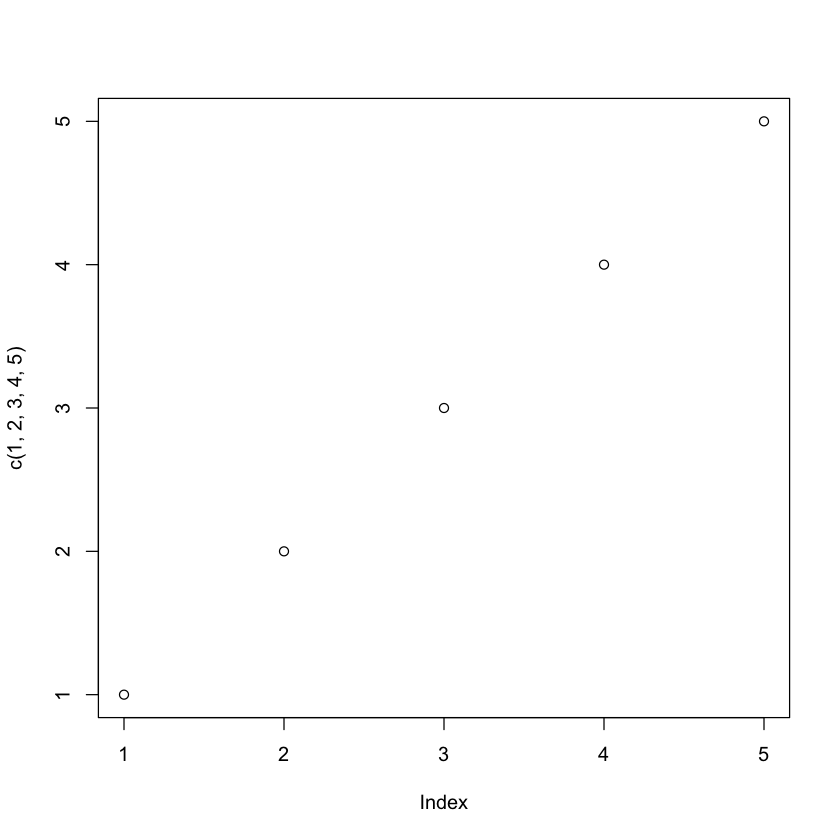

In [1]:
plot(c(1,2,3,4,5))

In [2]:
animal=c("dog", "cat", "sea cucumber", "sea urchin")
animal[2] # what animal is in the second element of the vector?
animal[c(3, 2)]
animal[2:4]
animal[c(3,2, 2:4)] # combining both what do you get?

[1] "cat"

[1] "sea cucumber" "cat"

[1] "cat"          "sea cucumber" "sea urchin"

[1] "sea cucumber" "cat"          "cat"          "sea cucumber" "sea urchin"

You probably dont want all you notebooks automatically pushing to github all of the time.  The above code does exclude sc